In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import yfinance as yf
import pandas as pd

import sys
sys.path.append('../')
from labels import oracle
import utils as weights_utils
import backward_looking as bl
import forward_looking as fl
import sequential_return as sr
import trend_interval_return as tir

In [2]:
ticker_symbol = 'GC=F'
start_date = '2023-12-05'
end_date = '2023-12-06'
start_time = "10:50:00"
end_time = "12:00:00"

prices = yf.download(ticker_symbol, start_date, end_date, interval='1m')['Close'].between_time(start_time, end_time)
prices.index = prices.index.tz_localize(None)

fee = 0.0004
labels = oracle.binary_trend_labels(prices, fee=fee)

prices = prices[prices.index.isin(labels.index)]

[*********************100%%**********************]  1 of 1 completed


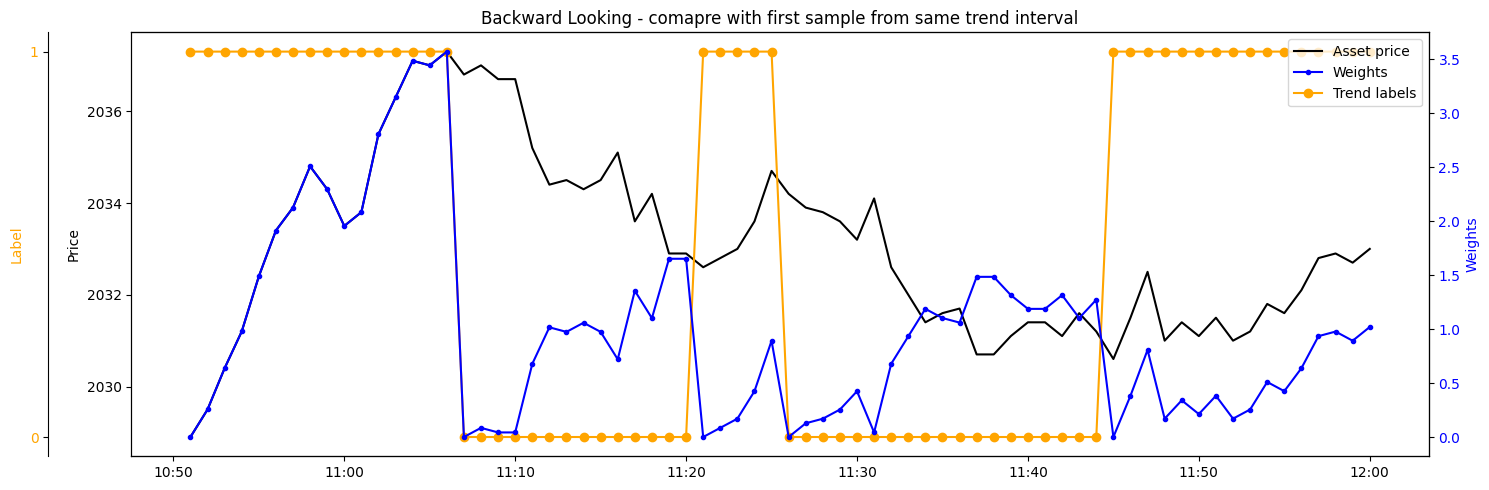

In [3]:
weights = bl.get_weights(prices, labels)
weights_utils.plot_weights('Backward Looking - comapre with first sample from same trend interval', prices, labels, weights)

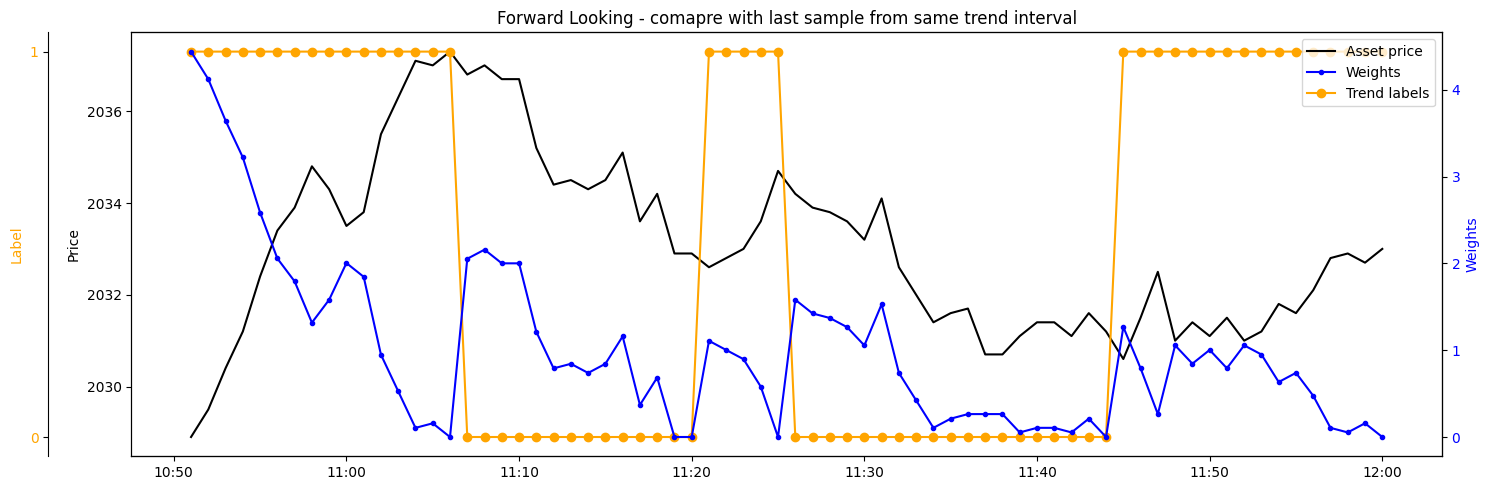

In [4]:
weights = fl.get_weights(prices, labels)
weights_utils.plot_weights('Forward Looking - comapre with last sample from same trend interval', prices, labels, weights)

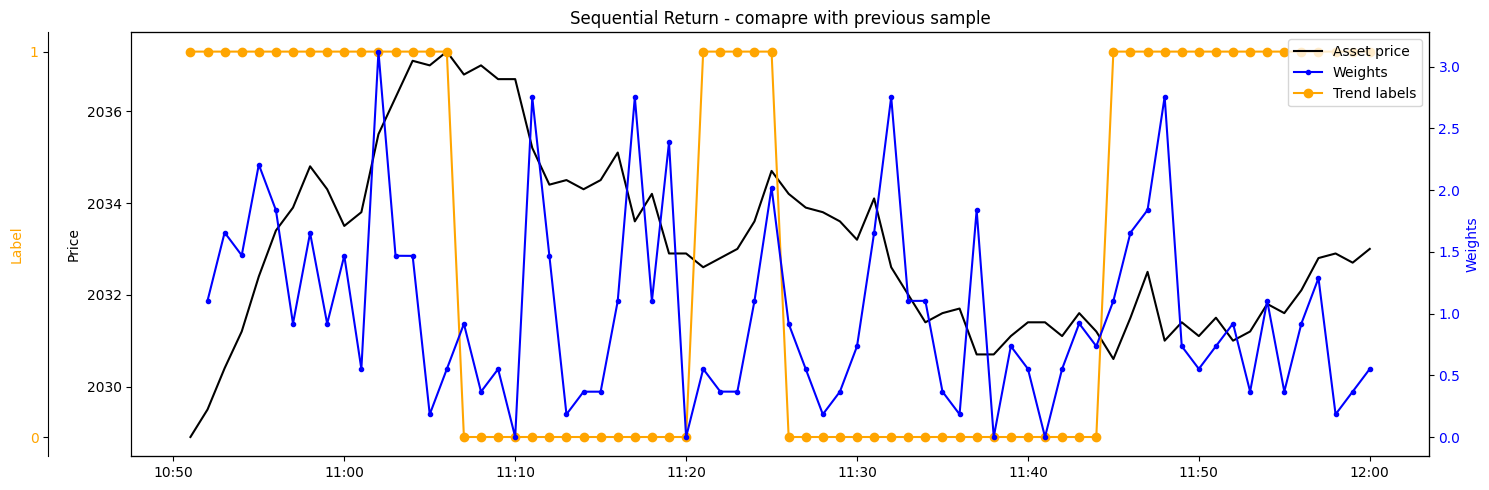

In [5]:
weights = sr.get_weights(prices, labels)
weights_utils.plot_weights('Sequential Return - comapre with previous sample', prices, labels, weights)

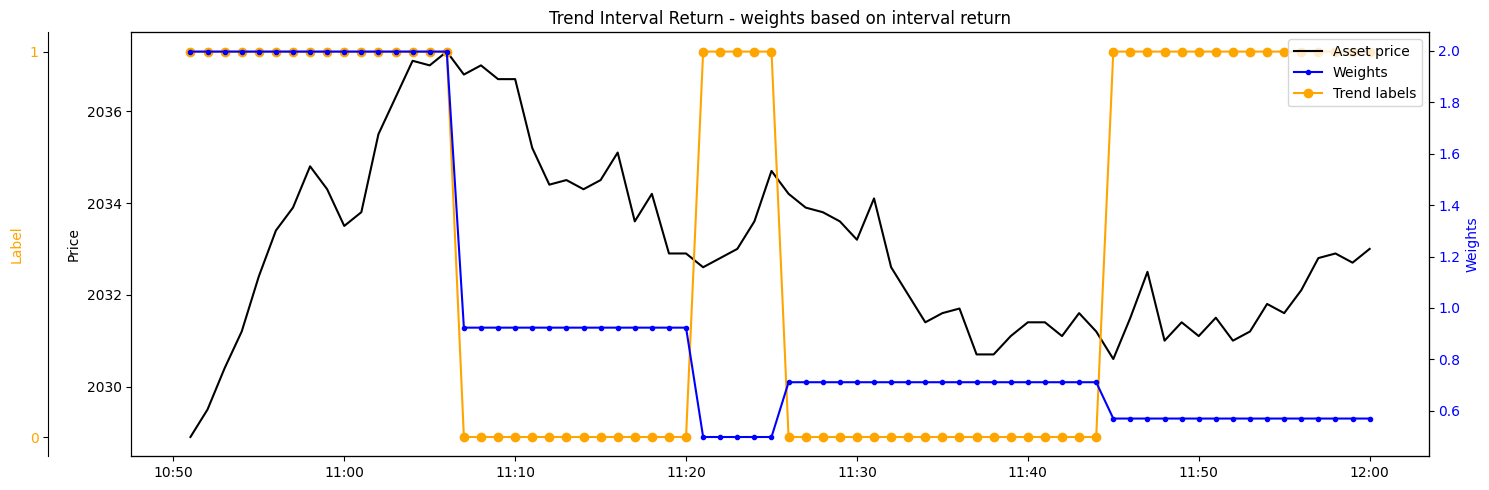

In [6]:
weights = tir.get_weights(prices, labels)
weights_utils.plot_weights('Trend Interval Return - weights based on interval return', prices, labels, weights)